# Jupyter Tikz anywidget

Render tikz diagrams as SVG using tikz wasm.

In [1]:
from jupyter_anywidget_tikz import tikz_headless
%load_ext jupyter_anywidget_tikz

g = tikz_headless()

tikzWidget(headless=True, response={'status': 'initialising'})

Display the response status and any SVG state (the latter should be empty):

In [4]:
g.response, g.svg



({'status': 'initialising'}, '')

When first calling the magic, we need to specify which widget we want to use with the magic. Use the `-w / --widget-name` magic parameter to set this value via the cell block magic:

In [4]:
%%tikz_magic --widget-name g
\\begin{document}
\\begin{tikzpicture}
\\draw (0,0) circle (1in);
\\end{tikzpicture}
\\end{document}`;

The response status and convenience svg property may be inspected. Note that if you run this quickly, they may not be set yet (the magic in its raw form is not blocking, and the tikz function runs asynchronously)...

In [5]:
g.response, g.doc_content

({'status': 'processing'},
 '\\\\begin{document}\n\\\\begin{tikzpicture}\n\\\\draw (0,0) circle (1in);\n\\\\end{tikzpicture}\n\\\\end{document}`;\n')

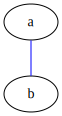

In [ ]:
from IPython.display import SVG

SVG(g.svg)

We can now assume the widget used by the magic:

In [ ]:
%%tikz_magic
  strict graph {
    a -- b
    a -- b
    b -- a [color=red]
  }

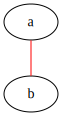

In [7]:
SVG(g.svg)

We can force a blocking behaviout (not JupyterLite) and then embed the generated SVG by adding the embed flag (`-e`) or setting a default timeout for a blobking action (`-t`; the default is 5s): 

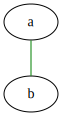

In [ ]:
%%tikz_magic -e -t 4
 strict graph {
    a -- b
    a -- b
    b -- a [color=green]
}

We can create a persistent inline widget whose display will follow the current widget state.

In [ ]:
from jupyter_anywidget_graphviz import graphviz_inline

g = tikz_inline()

graphvizWidget(response={'status': 'initialising'})

We can also set the widget used by the magic via line magic:

In [5]:
%setwidget g

We can call the magic directly having set the widget:

In [ ]:
%%tikz_magic
  strict graph {
    a -- b
    a -- b
    b -- a [color=cyan]
  }

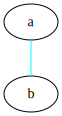

In [9]:
SVG(g.svg)

In [15]:
g.blocking_reply()
g.response

{'status': 'completed',
 'svg': '<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 12.1.0 (0)\n -->\n<!-- Pages: 1 -->\n<svg width="62pt" height="116pt"\n viewBox="0.00 0.00 62.00 116.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 112)">\n<polygon fill="white" stroke="none" points="-4,4 -4,-112 58,-112 58,4 -4,4"/>\n<!-- a -->\n<g id="node1" class="node">\n<title>a</title>\n<ellipse fill="none" stroke="black" cx="27" cy="-90" rx="27" ry="18"/>\n<text text-anchor="middle" x="27" y="-85.8" font-family="Times,serif" font-size="14.00">a</text>\n</g>\n<!-- b -->\n<g id="node2" class="node">\n<title>b</title>\n<ellipse fill="none" stroke="black" cx="27" cy="-18" rx="27" ry="18"/>\n<text text-anchor="middle" x="27" y="-13.8" font-family="Times,